* This notebook serves as a resource of study to help enhance knowledge on building, evaluating and analyzing the classification model in order to keep practice after graduating from Centennial College.


* Generic conclusion, change.
    * By checking the whole project and code, I believe that the model has achievied / not achievied the end goal. At first I believe that the model would not do it's objective due to it's first results, however after fine tunning the model, the accuracy jumped "XX"% and this gave more clarity towards which parameters I should change to achiev the end goal. Tried to give the best visualization using the comparison of the models as possible. 

# Basic Imports

In [1]:
# Exploratory Data Analysis and Politting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying the graphs on notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluating
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, f1_score, plot_roc_curve

# Loading Data

In [2]:
# Loading the data
df_heart_disease = pd.read_csv("heart-disease.csv")

# Checking the shape of the dataset
df_heart_disease.shape

(303, 14)

# Data Exploration (EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with

1. What questions I am trying to solve?
2. What kind of data do I have and how do I treat different types?
3. What' missing from the data and how do I deal with it?
4. Where are the outliers and why should I care about them?
5. How can I add, change or remove features to get more out of my data?

In [3]:
# Checking top of dataset
df_heart_disease.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
# Checking the bottom of dataset
df_heart_disease.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [5]:
# Checking the types and null-values 
df_heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Checking if the dataset has any empty values
df_heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df_heart_disease.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [8]:
# Checking the amount of values from target column (Has heart disease or not [1 / 0])
df_heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

By checking the values provided, it's possibile to visualize that the dataset has fairly balanced data, which will lead to a good result without needing feature engineering and using SMOTE to balance the dataset by downsampling or upsampling.

# Visualizing the finding as graph

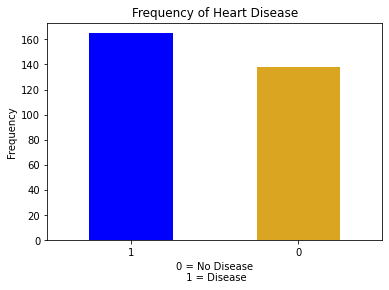

In [9]:
# Visualizing the frequency of positive and negative heart disease
df_heart_disease["target"].value_counts().plot(kind="bar",color=["blue","goldenrod"])
plt.title("Frequency of Heart Disease")
plt.xlabel("0 = No Disease\n 1 = Disease")
plt.ylabel("Frequency")
plt.xticks(rotation=0);

In [10]:
# Comparing multiple columns with the target column (Using crosstab).

# Getting a HeatMap to display the confusion matrix

In [11]:
# Making a correlation matrix
correlation_matrix = df_heart_disease.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation_matrix, linewidths=0.5, annot=True,cmap="YlGnBu");

# Modelling

In [12]:
# Splitting the data into X and y
X = df_heart_disease.drop("target", axis =1)
y = df_heart_disease["target"]

In [13]:
# Checking if the target column has been dropped.
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [14]:
# Checking the values of y
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [15]:
np.random.seed(42)

# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Building the Machine Learning Model

In [16]:
# Creating a dictionary with the models
models = {"Logistic Regression":LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates each machine learning model.
    """
    # Set random seed
    np.random.seed(42)
    # Dictionary to keep model scores
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        # Fitting the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append the score to the dictionary
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [17]:
# Appending each model with the function
model_scores = fit_and_score(models=models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)

# Checking the accuracy of each model
model_scores

C:\Users\dnek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Model Comparison

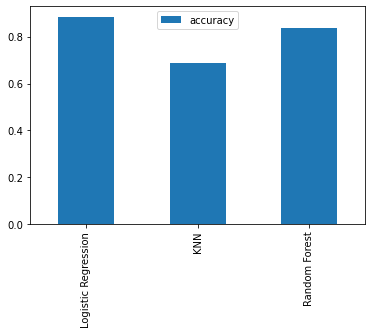

In [18]:
# Plotting the graph to better visualize the values
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# Hyperparameter Tunning for KNN

In [19]:
# For KNN model

"""Creating lists to append different values for different parameters and comparing them in the future """
knn_train_scores = []
knn_test_scores = []

# Creating different values for n-neighbors
knn_neighbors = range(1,21)

# Setting up the KNN instance
knn = KNeighborsClassifier()

# Looping through each value for n-neighbors
for i in knn_neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fitting the model
    knn.fit(X_train, y_train)
    
    # Updating the training score list
    knn_train_scores.append(knn.score(X_train,y_train))
    
    # Updating the test score list
    knn_test_scores.append(knn.score(X_test, y_test))

In [20]:
print("KNN train scores:\n",knn_train_scores)
print("KNN test scores:\n", knn_test_scores)

KNN train scores:
 [1.0, 0.8099173553719008, 0.7727272727272727, 0.743801652892562, 0.7603305785123967, 0.7520661157024794, 0.743801652892562, 0.7231404958677686, 0.71900826446281, 0.6942148760330579, 0.7272727272727273, 0.6983471074380165, 0.6900826446280992, 0.6942148760330579, 0.6859504132231405, 0.6735537190082644, 0.6859504132231405, 0.6652892561983471, 0.6818181818181818, 0.6694214876033058]
KNN test scores:
 [0.6229508196721312, 0.639344262295082, 0.6557377049180327, 0.6721311475409836, 0.6885245901639344, 0.7213114754098361, 0.7049180327868853, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.7540983606557377, 0.7377049180327869, 0.7377049180327869, 0.7377049180327869, 0.6885245901639344, 0.7213114754098361, 0.6885245901639344, 0.6885245901639344, 0.7049180327868853, 0.6557377049180327]


# Visualizing as a graph

Maximum KNN score on the test data: 75.41%


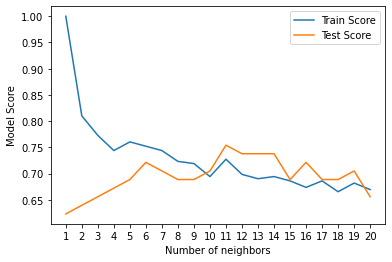

In [21]:
plt.plot(knn_neighbors, knn_train_scores,label="Train Score")
plt.plot(knn_neighbors, knn_test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(knn_test_scores)*100:.2f}%");

By visualizing the graph, the best test score for the KNN model, is when the model has n_neighbors = 11, which gives an accuracy around 0.75%.


This is still less than the accuracy provided by the logistic regression and random forest classifier without the hyperparameter tunning. 

# Hyperparameter tuning with RandomizedSearchCV

In [22]:
# Creating hyperparameter grid for LogisticRegression
lr_grid = {"C": np.logspace(-4,4,20),
          "solver":["liblinear"]}

# Creating hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

# Tuning the models using the RandomizedSearchCV

# Logistic Regression

In [23]:
# Generating the random seed.
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_lr = RandomizedSearchCV(LogisticRegression(),
                          param_distributions=lr_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fitting the hyperparameter search model into the LogisticRegression
rs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [24]:
# Finding the best hyperparameters
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [25]:
# Finding the best score
rs_lr.score(X_test,y_test)

0.8852459016393442

# Random Forest Classifier

In [26]:
# Generating the random seed.
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fitting the hyperparameter search model into the RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [27]:
# Finding the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [28]:
# Evaluating the randomized search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.8688524590163934

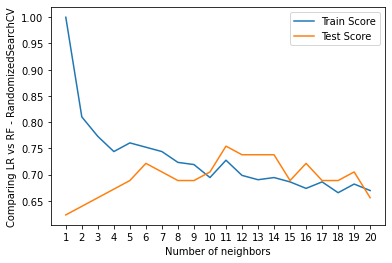

In [29]:
# Comparing both models in graph line
plt.plot(knn_neighbors, knn_train_scores,label="Train Score")
plt.plot(knn_neighbors, knn_test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Comparing LR vs RF - RandomizedSearchCV")
plt.legend()

# Hyperparameter Tuning with GridSearchCV

# Logistic Regression

In [30]:
# Creating hyperparameter grid for LogisticRegression
lr_grid = {"C": np.logspace(-4,4,30),
          "solver":["liblinear"]}

# Setup GridSearch hyperparameter for LogisticRegression
gs_lr = GridSearchCV(LogisticRegression(),
                    param_grid=lr_grid,
                    cv=5,
                    verbose=True)

# Fit grid hyperparameter saerch model
gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
# Checking the best hyperparameters
gs_lr.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [32]:
# Evaluating the GridSearch LogisticRegression
gs_lr.score(X_test, y_test)

0.8852459016393442

# Random Forest Classifier

In [33]:
# # Creating hyperparameter grid for RandomForestClassifier
# rf_grid = {"n_estimators": np.arange(10, 1000, 50),
#           "max_depth": [None, 3,5,10],
#           "min_samples_split":np.arange(2,20,2),
#           "min_samples_leaf": np.arange(1,20,2)}

# # Setup GridSearch hyperparameter for LogisticRegression
# gs_rf = GridSearchCV(RandomForestClassifier(),
#                           param_grid=rf_grid,
#                           cv=5,
#                           verbose=True)

# # Fit grid hyperparameter saerch model
# gs_rf.fit(X_train, y_train)

In [34]:
# # Checking the best hyperparameters
# gs_rf.best_params_

In [35]:
# # Evaluating the GridSearch LogisticRegression
# gs_rf.score(X_test, y_test)

# Evaluating the models using other methods besides accuracy

* ROC Curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

At this part will be applying other ways of comparing a model to decide which one is the best for the given problem

# Logistic Regression

In [36]:
# Creating predictions with LogisticRegression tuned model
y_pred = gs_lr.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\dnek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


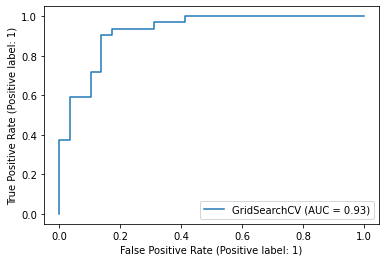

In [37]:
# Plotting the ROC curve and calculating AUC Metric
plot_roc_curve(gs_lr, X_test, y_test)

In [38]:
# Plotting confusion matrix 
sns.set(font_scale=1.5)

def plot_confusion (y_test, y_pred):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
plot_confusion(y_test, y_pred)

In [39]:
# Checking the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Checking the evaluation metrics using cross-validation

In [40]:
# Checking the best hyperparameters for logistic regression - GridSearch
gs_lr.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [41]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [42]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=10, scoring="accuracy")

cv_acc

array([0.87096774, 0.80645161, 0.87096774, 0.9       , 0.9       ,
       0.86666667, 0.83333333, 0.86666667, 0.7       , 0.73333333])

In [43]:
cv_acc = np.mean(cv_acc)
print("Accuracy:",cv_acc)

Accuracy: 0.8348387096774192


In [44]:
# Cross-validated Precision
cv_precision = cross_val_score(clf, X, y, cv=10, scoring="precision")

cv_precision

array([0.80952381, 0.78947368, 0.84210526, 0.9375    , 0.85      ,
       0.92857143, 0.78947368, 0.83333333, 0.66666667, 0.75      ])

In [45]:
cv_precision = np.mean(cv_precision)
print("Precision:",cv_precision)

Precision: 0.8196647869674185


In [46]:
# Cross-validated Recall
cv_recall = cross_val_score(clf, X, y, cv=10, scoring="recall")

cv_recall

array([1.        , 0.88235294, 0.94117647, 0.88235294, 1.        ,
       0.8125    , 0.9375    , 0.9375    , 0.875     , 0.75      ])

In [47]:
cv_recall = np.mean(cv_recall)
print("Recall:",cv_recall)

Recall: 0.9018382352941178


In [48]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=10, scoring="f1")

cv_f1

array([0.89473684, 0.83333333, 0.88888889, 0.90909091, 0.91891892,
       0.86666667, 0.85714286, 0.88235294, 0.75675676, 0.75      ])

In [49]:
cv_f1 = np.mean(cv_f1)
print("F1 Score:",cv_f1)

F1 Score: 0.8557888114080064


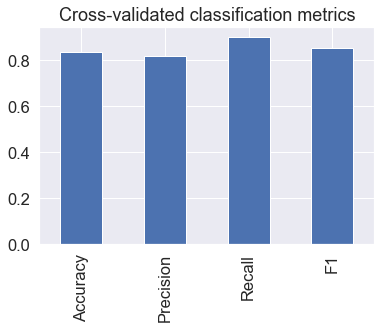

In [50]:
# Visualized cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

# Feature Importance

Which features contributed most to the outcomes of the mode and how did they contribute?

In [51]:
# Fit an instance of the Logistic Regression
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [52]:
# Checking the coeficient 
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [53]:
# Match coef's of features to columns
feature_dict = dict(zip(df_heart_disease.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672769574500135,
 'sex': -0.8604461876509621,
 'cp': 0.6606705956911073,
 'trestbps': -0.011569931563712749,
 'chol': -0.0016637424209784567,
 'fbs': 0.04386123481544026,
 'restecg': 0.3127581278171948,
 'thalach': 0.02459361107844528,
 'exang': -0.6041306062020464,
 'oldpeak': -0.5686283181245352,
 'slope': 0.4505162370054866,
 'ca': -0.6360987949056705,
 'thal': -0.6766338344951353}

# Visualizing feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [54]:
pd.crosstab(df_heart_disease["sex"],df_heart_disease["target"])

target    0   1
sex            
0        24  72
1       114  93

In [55]:
pd.crosstab(df_heart_disease["slope"],df_heart_disease["target"])

target   0    1
slope          
0       12    9
1       91   49
2       35  107